# Plotting DataFrames

Matplotlib and Pandas offer a well-integrated environment for data analysis and visualization in Python. While they are separate libraries, pandas provides built-in plotting functionalities that leverage Matplotlib under the hood. This integration makes it very convenient to visualise Pandas DataFrames and Series directly.


In [1]:
# Importing packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Random Data

Plotting graphs based on randomized data


<Axes: >

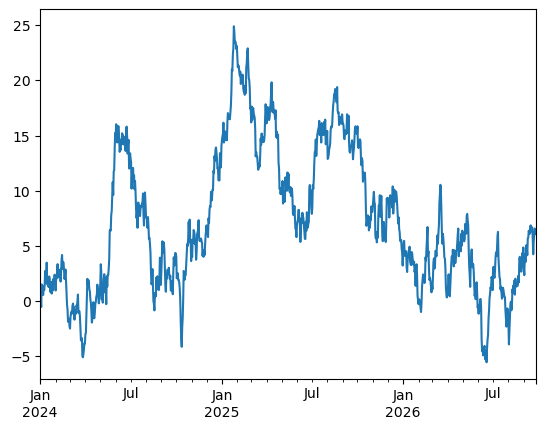

In [ ]:
# Creating Series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('01/01/2024', periods=1000))

# Creating cumulative sum
ts = ts.cumsum()

# Plotting Series
ts.plot()

In [ ]:
# Creating data
x = np.random.rand(10, 4)

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.293795,0.436434,0.952207,0.392133
1,0.627781,0.997816,0.746395,0.627836
2,0.691546,0.425265,0.872542,0.732178
3,0.506326,0.306161,0.084303,0.764517
4,0.743097,0.876095,0.088702,0.349036
5,0.270171,0.635153,0.231382,0.579192
6,0.061978,0.050351,0.010927,0.684558
7,0.809308,0.710308,0.155977,0.586668
8,0.422499,0.257493,0.225602,0.401114
9,0.777844,0.440134,0.772905,0.746283


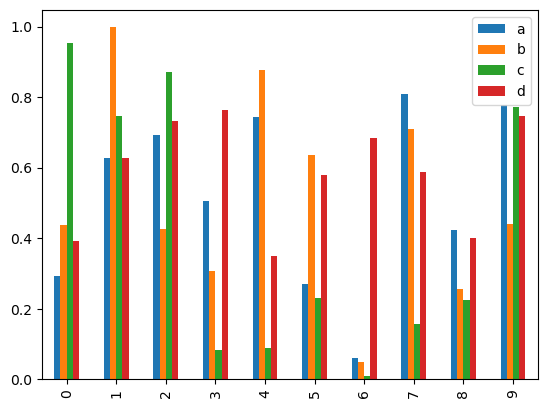

In [ ]:
# Bar plotting new data
df.plot.bar()

In [ ]:
# Creating bar plot in a different way
df.plot(kind='bar')

## Car Sales CSV

Plotting graphs based on the data available in 'car_sales.csv'.


In [3]:
# Creating DataFrame
car_sales = pd.read_csv('datasets/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [4]:
# RegExp to replace characters in the string
car_sales['Price'] = car_sales['Price'].str.replace('[$,.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [5]:
# Checking datatype
type(car_sales['Price'][0])

str

In [6]:
# Removing the last two zeros
car_sales['Price'] = car_sales['Price'].str[:-2].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [7]:
# Creating 'Sale Date' column
car_sales['Sale Date'] = pd.date_range('01/01/2024', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [8]:
# Creating 'Total Sales' column
car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


<Axes: xlabel='Sale Date'>

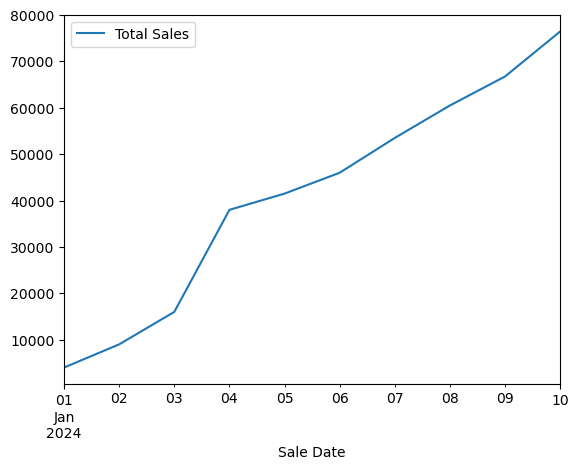

In [9]:
# Creating a line plot from the 'Total Sales' column
car_sales.plot(x='Sale Date', y='Total Sales')

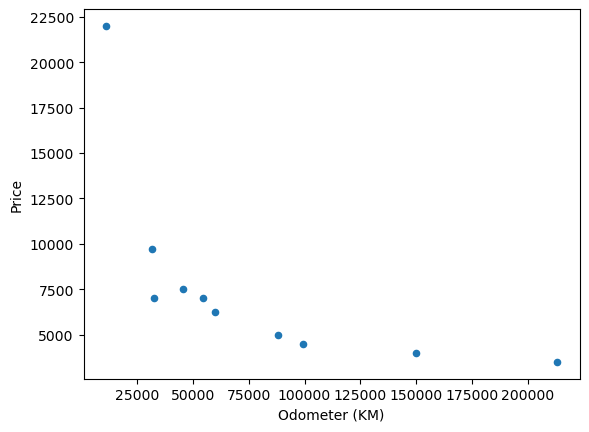

In [12]:
# Creating a scatter plot from the 'Total Sales' column
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter')

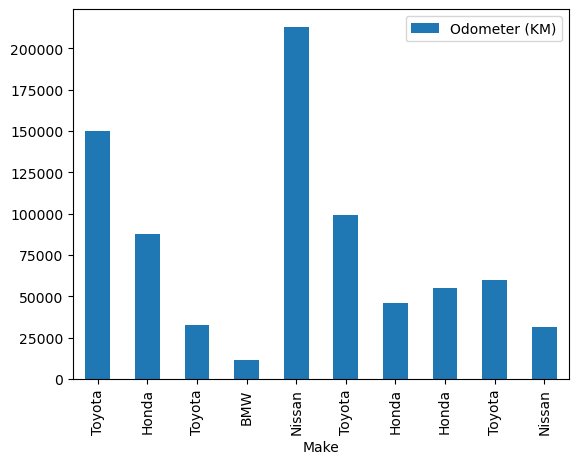

In [19]:
# Bar plotting car sales data
car_sales.plot.bar(x='Make', y='Odometer (KM)')

<Axes: ylabel='Frequency'>

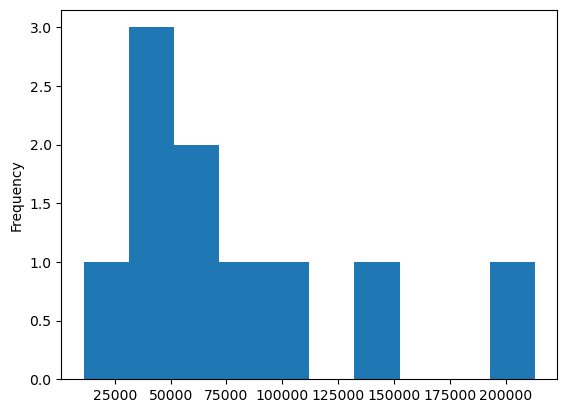

In [ ]:
# Creating a Histogram from the car_sales data
car_sales['Odometer (KM)'].plot.hist()

## Heart Disease CSV

Plotting graphs based on the data available in the 'heart_disease.csv' dataset.


In [22]:
# Creating DataFrame
heart_disease = pd.read_csv('datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='Frequency'>

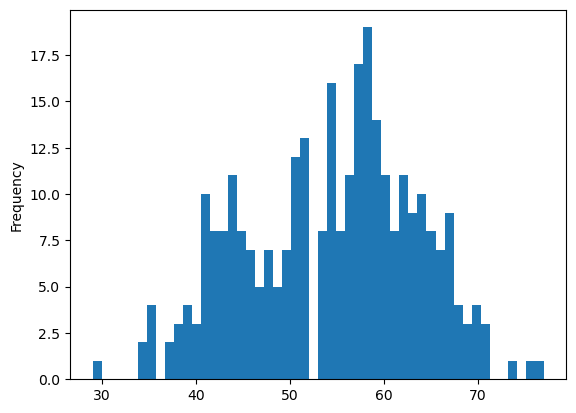

In [26]:
# Creating a histogram of age
heart_disease['age'].plot.hist(bins=50)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

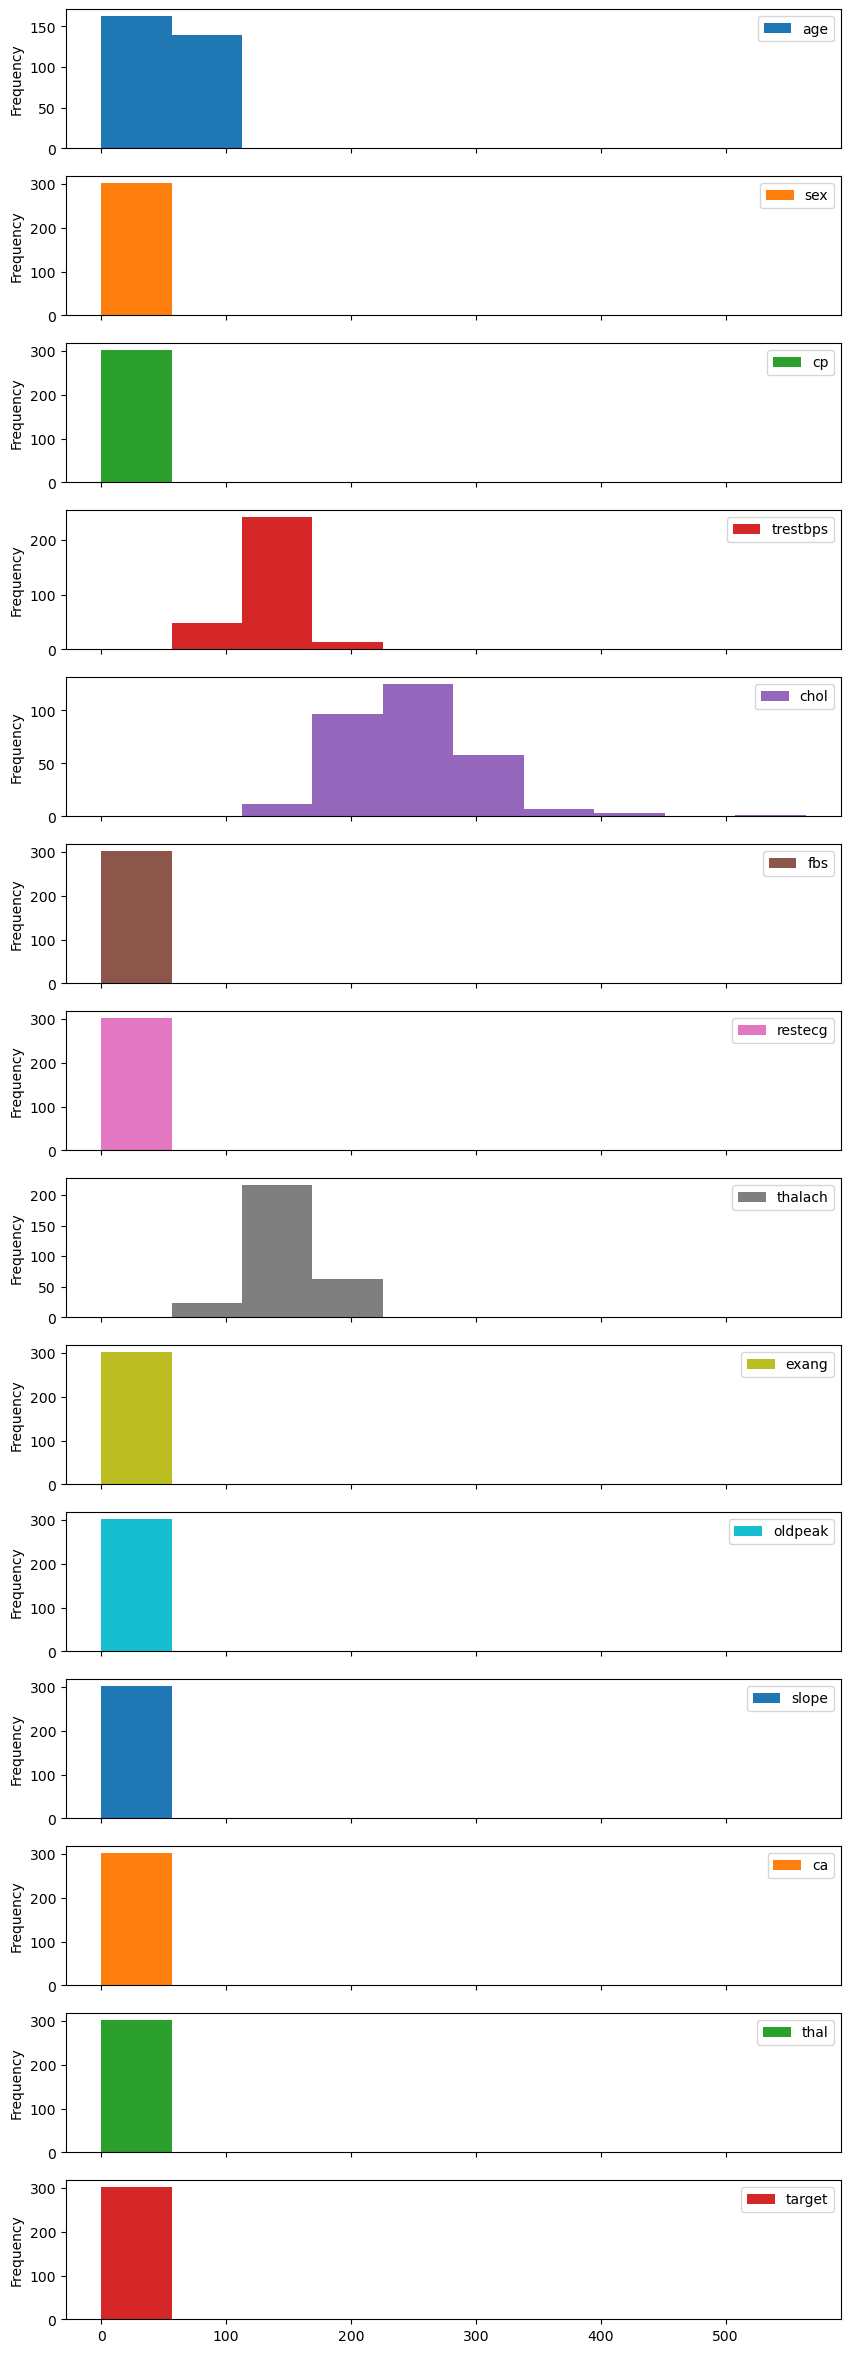

In [28]:
# Creating a subplot based on the data
heart_disease.plot.hist(figsize=(10, 30), subplots=True)

The plot above isn't great, the measurements don't apply to all of the data

When plotting something quickly, it's okay to use pyplot, but when the plot should be more advanced, use the OO method.


In [33]:
# Selecting the people in the dataset that are over 50
over_50 = heart_disease[heart_disease['age'] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


<Axes: xlabel='age', ylabel='chol'>

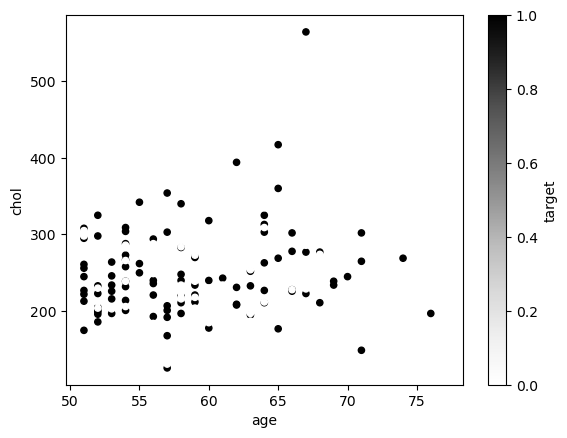

In [36]:
# Creating a scatter plot from data (Pyplot)
over_50.plot.scatter(
    x='age',
    y='chol',
    c='target',
)

<Axes: xlabel='age', ylabel='chol'>

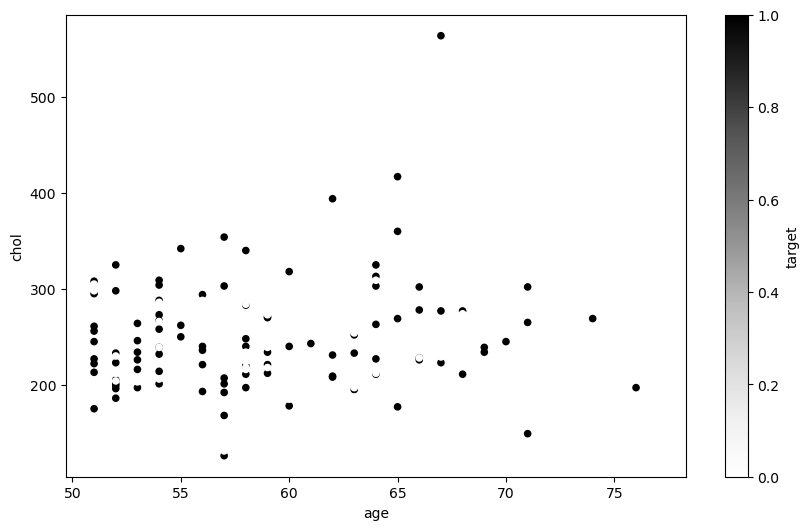

In [42]:
# Creating scatter plot form data (OO method mixed with Pyplot)
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot.scatter(x='age', y='chol', c='target', ax=ax)

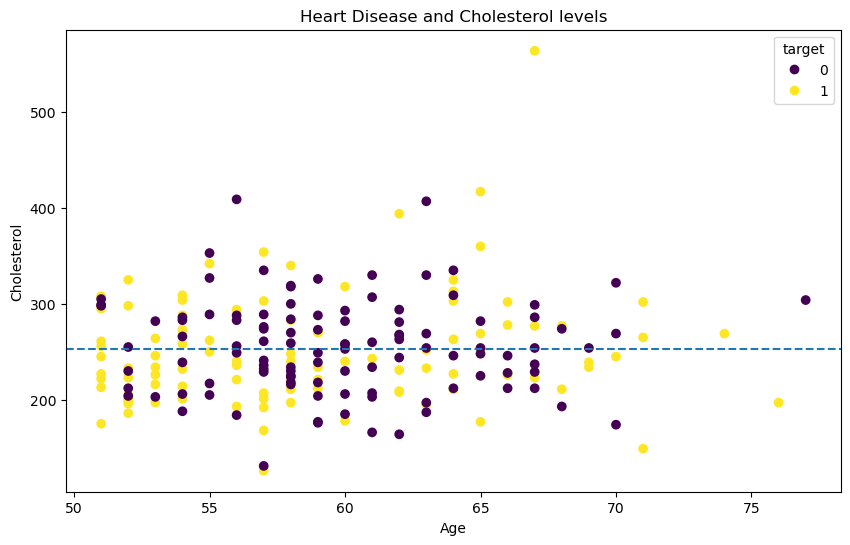

In [51]:
# Creating scatter plot from data (OO method)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting data
scatter = ax.scatter(
    x=over_50['age'],
    y=over_50['chol'],
    c=over_50['target'],
)

# Customize the plot
ax.set(title='Heart Disease and Cholesterol levels',
       xlabel='Age',
       ylabel='Cholesterol')

# Add a legend
ax.legend(*scatter.legend_elements(), title='target')

# Add horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--')

Text(0.5, 0.98, 'Heart Disease analysis')

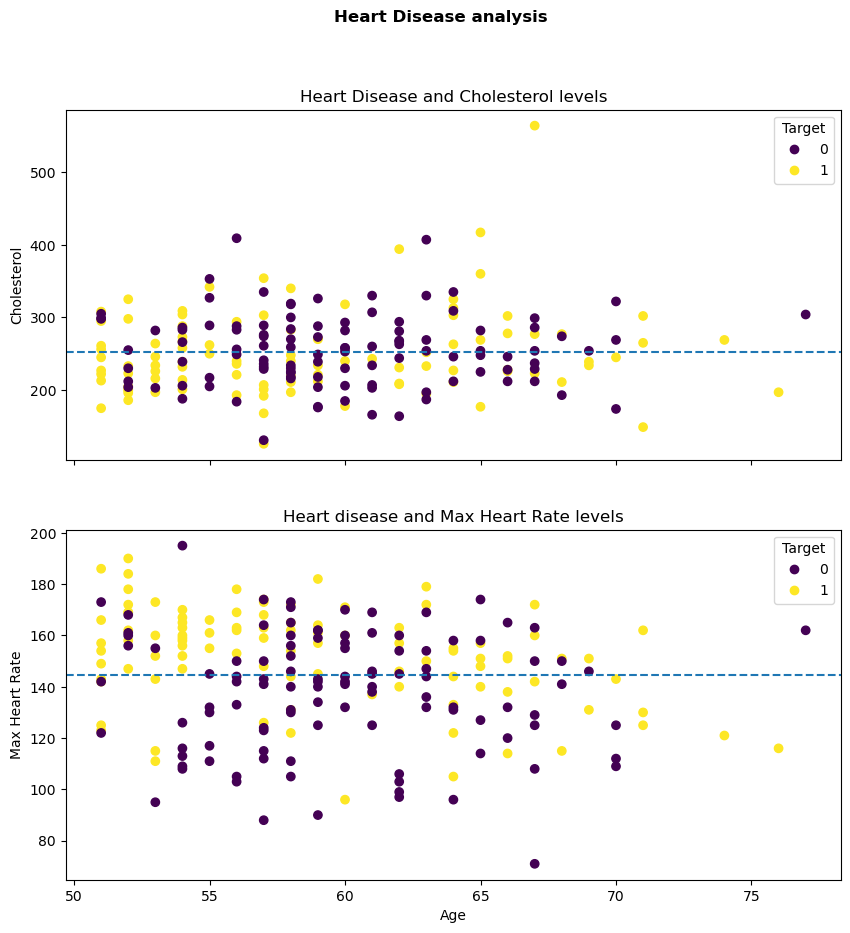

In [69]:
# Subplot of chol, age, thalcah
fig, (ax0, ax1) = plt.subplots(
    figsize=(10, 10),
    nrows=2,
    ncols=1,
    sharex=True,
)

# Adding data to ax0
scatter = ax0.scatter(
    x=over_50['age'],
    y=over_50['chol'],
    c=over_50['target'],
)

# Customize the plot
ax0.set(
    title='Heart Disease and Cholesterol levels',
    # xlabel='Age',
    ylabel='Cholesterol',
)

# Add a legend
ax0.legend(*scatter.legend_elements(), title='Target')

# Add horizontal line
ax0.axhline(over_50['chol'].mean(), linestyle='--')

# Adding data to ax1
scatter = ax1.scatter(
    x=over_50['age'],
    y=over_50['thalach'],
    c=over_50['target'],
)

# Customizing the plot
ax1.set(
    title='Heart disease and Max Heart Rate levels',
    xlabel='Age',
    ylabel='Max Heart Rate',
)

# Adding legend
ax1.legend(*scatter.legend_elements(), title='Target')

# Adding horizontal line
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# Adding a title to the figure
fig.suptitle('Heart Disease analysis', fontweight='bold')